# Import Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv' , delimiter = ';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No null value

Categorical variables : job, marital, education, default, houseing, loan , contact, month, poutcomes, y
Numeric data: age, balance, day, pdays, previous

<AxesSubplot:>

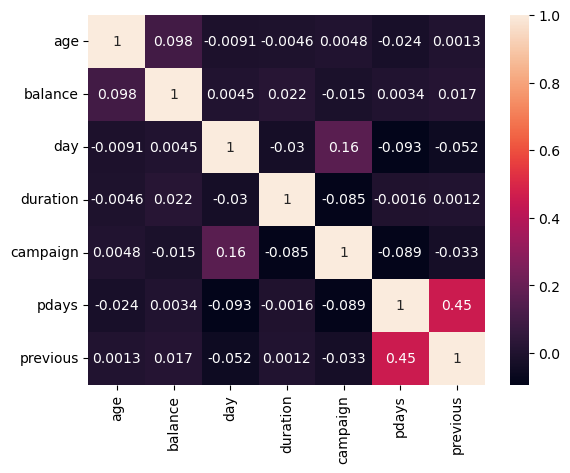

In [5]:
sns.heatmap(df.corr(), annot = True)

### Age Distribution

<AxesSubplot:xlabel='age', ylabel='Count'>

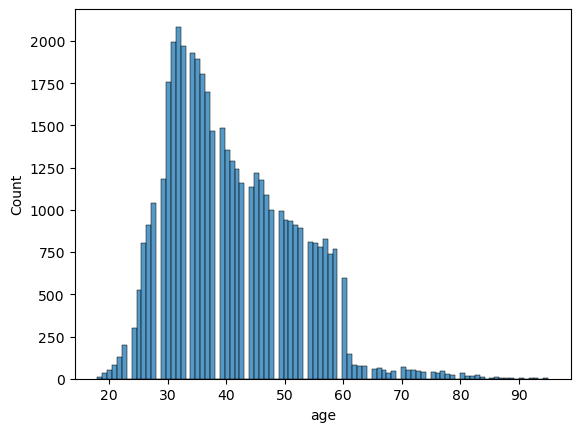

In [6]:
sns.histplot(data = df, x = 'age' )

People with age 28 to 38 are more likly to get called from bank

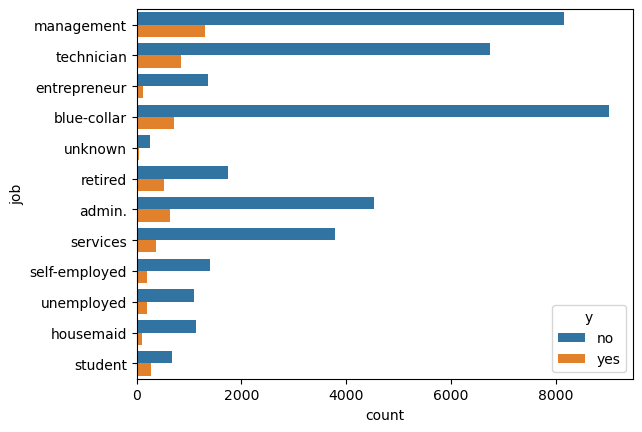

In [7]:
g = sns.countplot(data = df, y = 'job'  , hue = 'y')
# g.set_xticklabels(g.get_xticklabels(), rotation = 90)

Most of the Blue - collar worker, management and technician get call from the bank
Success rate is more in bank 

Text(0.5, 1.0, 'Education background')

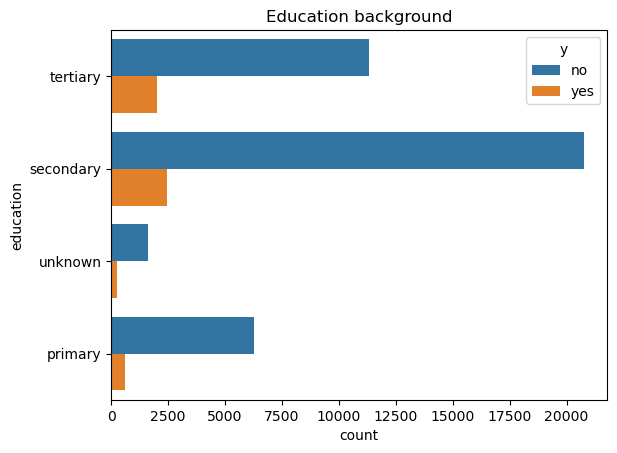

In [8]:
g = sns.countplot(data = df, y = 'education' , hue = 'y' )
plt.title('Education background')

Text(0.5, 1.0, 'Marital background')

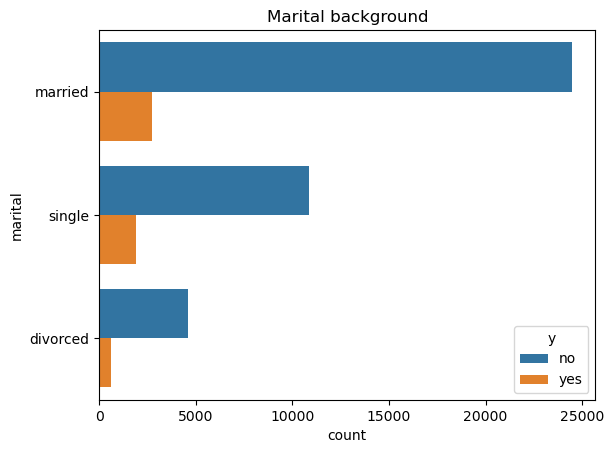

In [9]:
g = sns.countplot(data = df, y = 'marital' , hue = 'y' )
plt.title('Marital background')

There is not any kind of patterns

([<matplotlib.axis.YTick at 0x259f0f938b0>,
 [Text(0, 0, 'With Loan'), Text(0, 1, 'Without Loan')])

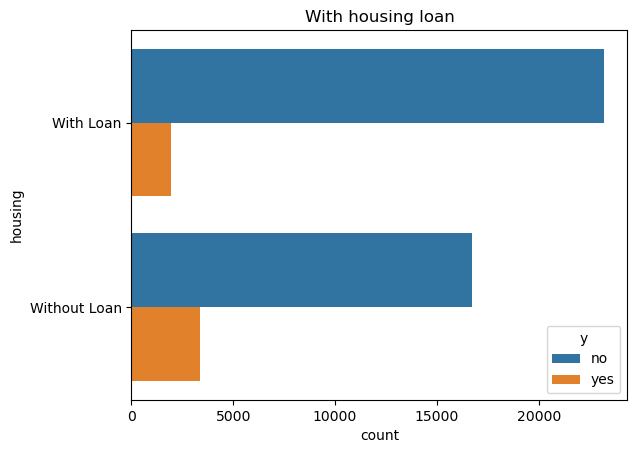

In [10]:
g = sns.countplot(data = df, y = 'housing' , hue = 'y' )
plt.title('With housing loan')
plt.yticks([0,1] ,labels = ['With Loan' , 'Without Loan'])

([<matplotlib.axis.YTick at 0x259f0ff44c0>,
 [Text(0, 0, 'Without Loan'), Text(0, 1, 'With Loan')])

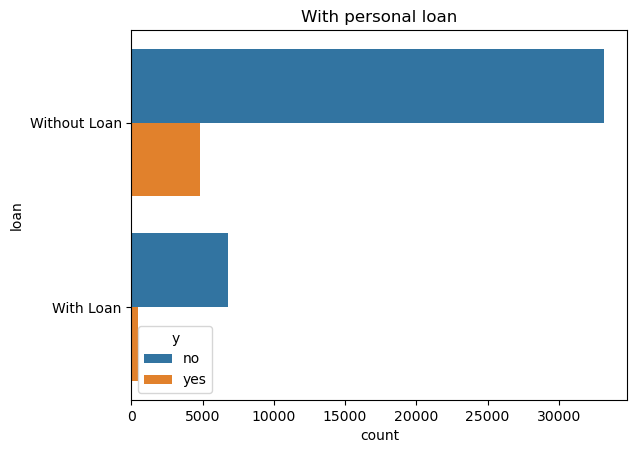

In [11]:
g = sns.countplot(data = df, y = 'loan' , hue = 'y' )
plt.title('With personal loan')
plt.yticks([0,1] ,labels = ['Without Loan' , 'With Loan'])

People without loan ar more likly to take another loan

# Conveting Categorical Data

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier



In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
x = df.drop('y', axis = 1)

In [15]:
y = df['y']

In [16]:
ohe = ColumnTransformer( [
    ('oneHotEncoder' , OneHotEncoder(sparse = False , handle_unknown = 'ignore') , [1,2,3,4 ,6 ,7,8,10,15])
] , remainder = 'passthrough')

In [17]:
ohe.fit_transform(x)

array([[  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   0., ...,   1.,  -1.,   0.],
       [  0.,   0.,   1., ...,   1.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ...,   5., 184.,   3.],
       [  0.,   1.,   0., ...,   4.,  -1.,   0.],
       [  0.,   0.,   1., ...,   2., 188.,  11.]])

In [18]:
scale = ColumnTransformer([
    ('scaler' , StandardScaler(), slice(0,x.shape[1]))
] , remainder = 'passthrough')

In [19]:
model = DecisionTreeClassifier()

## Making pipeline

In [20]:
pipe = Pipeline([
    ('ohe', ohe),
    ('scale', scale ),
    ('model' , model)
    
])

## Train-Test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

## Fitting the model

In [23]:
from sklearn import set_config

In [24]:
set_config(display = 'diagram')

In [25]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8, 10,
                                                   15])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 16, None))])),
                ('model', DecisionTreeClassifier())])

## Predict

In [26]:
y_pred = pipe.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy = accuracy_score(y_pred , y_test)

In [29]:
accuracy

0.8754837996240186

## Cross Validation 

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(pipe, x_train,y_train, cv = 5, scoring = 'accuracy').mean()

0.8741430402945735

## Grid Search

In [32]:
param ={
    'model__max_depth':[1,5,10,15,20,None]
}

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(pipe, param , cv = 5, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ohe',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('oneHotEncoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1, 2,
                                                                          3, 4,
                                                                          6, 7,
                                                                          8, 10,
                                                                          15])])),
                                       ('scale',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         slice(0, 16, None))])),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [1, 5, 10, 15, 20, None]},
             scoring='accuracy')

In [35]:
grid.best_score_

0.9022340850831869

In [36]:
grid.best_params_

{'model__max_depth': 5}

# Redefining the model with max_depth

In [38]:
model = DecisionTreeClassifier(max_depth = 5)

In [40]:
new_pipe = Pipeline([
    ('ohe', ohe),
    ('scale', scale ),
    ('model' , model)
    
])

# Fitting 

In [42]:
new_pipe.fit(x_train, y_train)

Pipeline(steps=[('ohe',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3, 4, 6, 7, 8, 10,
                                                   15])])),
                ('scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 16, None))])),
                ('model', DecisionTreeClassifier(max_depth=5))])

# Prediction

In [43]:
y_pred_new = new_pipe.predict(x_test)

In [44]:
accuracy = accuracy_score(y_pred_new , y_test)
accuracy

0.8973791883224593

In [45]:
cross_val_score(pipe, x_train,y_train, cv = 5, scoring = 'accuracy').mean()

0.9022340850831869

## Exporting the Pipeline

In [46]:
import pickle

In [47]:
pickle.dump(new_pipe, open('pipe.pkl', 'wb'))